# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# 2. Get data

In [3]:
# label/target variable
#read csv water_pump_set
df_wpset = pd.read_csv('water_pump_set.csv')

In [4]:
df_wpset.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# feature/predictive variables
#read csv water_pump_labels
df_wplabels = pd.read_csv('water_pump_labels.csv')

In [6]:
df_wplabels.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
#list of all features/predictive variables
list(df_wplabels.columns.values)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

## 2.1 Merge feature and label dataframes

In [9]:
#merge dataframes
df = pd.merge(df_wplabels, df_wpset, on='id')

In [10]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
# show amount of rows and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

# 3. Data Cleaning and pre-processesing

## 3.1 Transform target labels into numerical values

In [12]:
# convert target variables into integers
df.status_group.replace(['functional', 'functional needs repair', 'non functional'], [2,1,0], inplace=True)

In [13]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2


## 3.1 Check for missing data

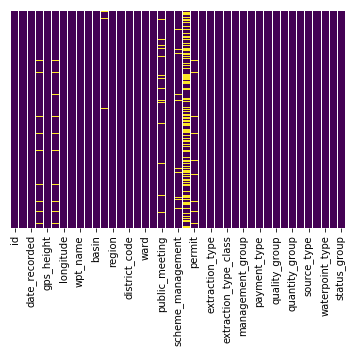

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 3.1.1 Show amount of missing values

In [15]:
# amount of missing values for each feature
missing_values = df.apply(lambda x: sum(x.isnull()))

In [16]:
# show all features witl missing values
missing_values[missing_values>0]

funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

### 3.1.2 Show percentage of zero values

In [17]:
# percentage of zero values for each feature
zero_values = df.apply(lambda x: sum(x==0)/59400*100)

In [18]:
zero_values[zero_values>0]

id                    0.001684
amount_tsh           70.099327
gps_height           34.407407
longitude             3.050505
num_private          98.725589
district_code         0.038721
population           35.994949
public_meeting        8.510101
permit               29.447811
construction_year    34.863636
status_group         38.424242
dtype: float64

Conclusion: funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit all have missing values
Amount_tsh, gps_height, num_private, population, public_meeting, permit and construction_year have signficant percentage of zero values

## 3.2 Drop irrelevant features with similar data

Drop all irrelevant features or features with too many missing values or zeros, see presentation for further explanation

Features with overlapping information are considered irrelevant. Maintaining overlapping features causes risk for over-fitting

In [19]:
df.drop(['id','amount_tsh','date_recorded','num_private','wpt_name','subvillage','region_code','district_code','lga','ward','recorded_by','scheme_management','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality','quantity','source','source_class','waterpoint_type_group'], axis=1, inplace=True)

In [20]:
df.head()

,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,waterpoint_type,status_group
0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,False,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,2
1,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,NaN,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,2
2,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,250,True,True,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe multiple,2
3,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,True,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe multiple,0
4,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0,True,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,2


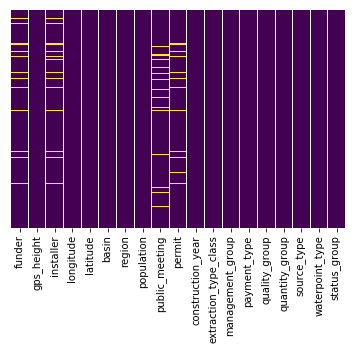

In [21]:
# show missing values after dropping several features
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 3.3 Fill missing and zero values

In this section, all the missing and zero values will be filled with a certain strategy. 

### 3.3.1 Fill missing and zero values for permit and public_meeting

In [22]:
# fill missing values of permit with 'Unknown'
df.permit.fillna('Unknown', inplace=True)

In [23]:
# fill zero values of permit with 'Unknown'
df.permit.replace(0,'Unknown', inplace=True) 

In [24]:
# fill missing values of public_meeting with 'Unknown'
df.public_meeting.fillna('Unknown', inplace=True)

In [25]:
# fill zero values of permit with 'Unknown'
df.public_meeting.replace(0,'Unknown', inplace=True) 

### 3.3.2 Drop zero values

In [26]:
# Longitude is only 3% of the dataset. Therefore it probably would not make the model signifantly better it would be filled. 
df.drop(df[df.longitude==0].index, axis = 0, inplace = True)

## 3.4 Group low frequency values

### 3.4.1 Group low frequency values of funder

In [27]:
# Check unique values for funder
df.funder.value_counts()

Government Of Tanzania    8842
Danida                    3114
Hesawa                    1914
World Bank                1345
Kkkt                      1287
World Vision              1224
Rwssp                     1187
Unicef                    1035
District Council           843
Tasaf                      834
Dhv                        829
Private Individual         824
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                461
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Fini Water                 393
Dwsp                       359
Oxfam                      359
Wateraid                   333
Rc Church                  321
Isf                        316
                          ... 
Getekwe                      1
Mwalimu 

##### Show the top 10 most common funders

In [28]:
df.funder.value_counts()[:10]

Government Of Tanzania    8842
Danida                    3114
Hesawa                    1914
World Bank                1345
Kkkt                      1287
World Vision              1224
Rwssp                     1187
Unicef                    1035
District Council           843
Tasaf                      834
Name: funder, dtype: int64

All remainings funder will be classified as 'other'

In [29]:
# Create list of top ten most common values of funders
top_ten = ['Government Of Tanzania','Danida','Hesawa','World Bank','Kkkt','World Vision','Rwssp','Unicef','District Council','Tasaf']

In [30]:
top_ten

['Government Of Tanzania',
 'Danida',
 'Hesawa',
 'World Bank',
 'Kkkt',
 'World Vision',
 'Rwssp',
 'Unicef',
 'District Council',
 'Tasaf']

In [31]:
# Function that returns the value 'Other' for every funder other than in the top_ten list
def funder_other(x):
    if x.funder in top_ten:
        return x.funder
    else:
        return 'Other'

In [32]:
# apply function to replace values with 'Other'
df.funder = df.apply(funder_other, axis=1)

### 3.4.2 Group low frequency values of installer

##### Show the top 10 most common installer

In [33]:
df.installer.value_counts()

DWE                             16255
Government                       1670
RWE                              1181
Commu                            1060
DANIDA                           1050
KKKT                              897
Hesawa                            803
0                                 777
TCRS                              707
Central government                619
CES                               610
DANID                             552
District Council                  551
Community                         539
HESAWA                            537
LGA                               408
World vision                      408
WEDECO                            397
District council                  392
Gover                             383
TASAF                             377
AMREF                             329
TWESA                             316
WU                                301
Dmdd                              287
ACRA                              278
SEMA        

In [34]:
df.installer.value_counts()[:11]

DWE                   16255
Government             1670
RWE                    1181
Commu                  1060
DANIDA                 1050
KKKT                    897
Hesawa                  803
0                       777
TCRS                    707
Central government      619
CES                     610
Name: installer, dtype: int64

In [35]:
# Create list of top ten most common values of installers, except the '0' value
top_ten_installer = ['DWE','Government','RWE','Commu','DANIDA','KKKT','Hesawa','TCRS','Central government','CES']

In [36]:
# Function that returns the value 'Other' for every installer other than in the top_ten_installer list
def installer_other(x):
    if x.installer in top_ten_installer:
        return x.installer
    else:
        return 'Other'

In [37]:
# apply function to replace values with 'Other'
df.installer = df.apply(installer_other, axis=1)

### 3.4.3 Group construction years

In [38]:
# function to classify construction years. Zero values will get the class 'Unknown'
def construction_year_class(x):
    if x['construction_year'] >= 1960 and x['construction_year'] < 1970:
        return '60s'
    elif x['construction_year'] >= 1970 and x['construction_year'] < 1980:
        return '70s'
    elif x['construction_year'] >= 1980 and x['construction_year'] < 1990:
        return '80s'
    elif x['construction_year'] >= 1990 and x['construction_year'] < 2000:
        return '90s'
    elif x['construction_year'] >= 2000 and x['construction_year'] < 2010:
        return '00s'
    elif x['construction_year'] >= 2010:
        return '10s'
    else:
        return 'Unknown'

In [39]:
# apply function to construction_years values with classes as defined in the function
df.construction_year = df.apply(construction_year_class, axis=1)

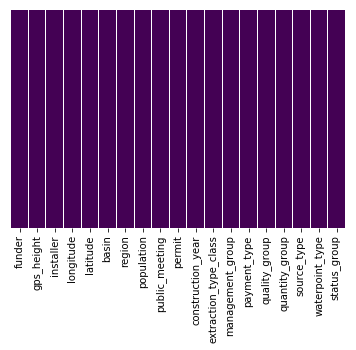

In [40]:
# check for remaining missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
# Percentage of zero values for each feature. 
df.apply(lambda x: sum(x==0)/59400*100)

funder                    0.000000
gps_height               31.356902
installer                 0.000000
longitude                 0.000000
latitude                  0.000000
basin                     0.000000
region                    0.000000
population               32.944444
public_meeting            0.000000
permit                    0.000000
construction_year         0.000000
extraction_type_class     0.000000
management_group          0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_type               0.000000
waterpoint_type           0.000000
status_group             37.488215
dtype: float64

Only gps_height and population have zero values. In both cases, zero values most likely indicate a missing value

## 3.5 Fill zero values for gps_height and population

Text(0.5,0,'gps_height')

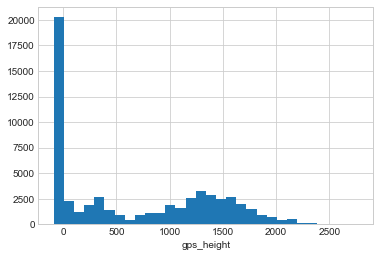

In [42]:
# histogram of gps_height
sns.set_style('whitegrid')
df['gps_height'].hist(bins=30)
plt.xlabel('gps_height')

In [43]:
# pairplot gps_height and longitude & latitude
pair_df= df[['gps_height','longitude','latitude']]

C:\Users\nho01131\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


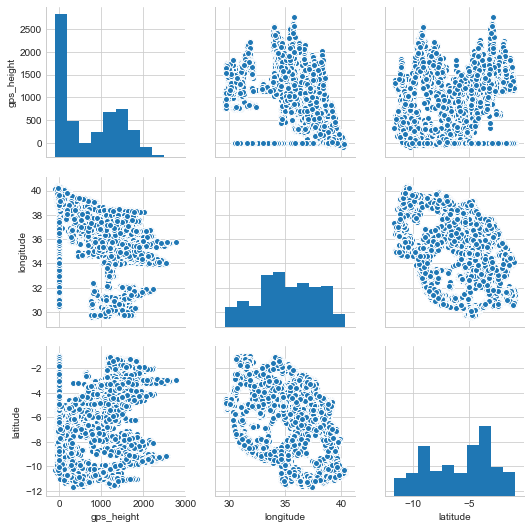

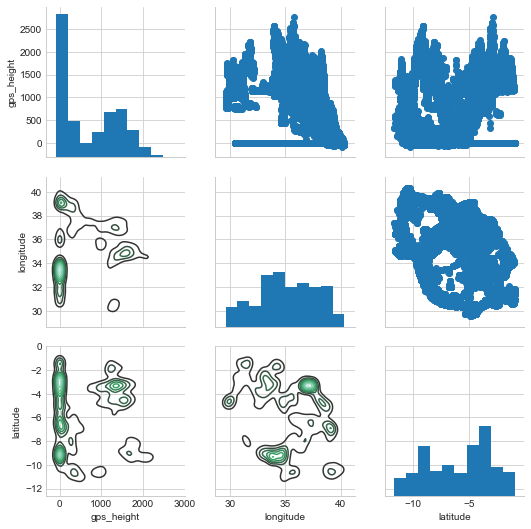

In [45]:
sns.pairplot(pair_df,palette='hls')

# Map to upper,lower, and diagonal
g = sns.PairGrid(pair_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### 3.5.1 Fill missing values of gps_heights based on a linear regression of both longitude and latitude

The zero values of gps_height will be filled with the mean gps_height values of the coherent basin

In [48]:
# create df with gps_heights not equal to zero
df_gps = df[df['gps_height']!=0]

In [49]:
# mean gps_height values per basin
mean_gps = df_gps.groupby(['basin'])['gps_height'].mean()

In [50]:
# show mean values per basin
mean_gps

basin
Internal                   1474.550470
Lake Nyasa                 1524.654237
Lake Rukwa                 1415.137352
Lake Tanganyika            1270.063242
Lake Victoria              1329.265008
Pangani                    1081.716006
Rufiji                     1029.789034
Ruvuma / Southern Coast     411.189436
Wami / Ruvu                 268.418893
Name: gps_height, dtype: float64

In [51]:
# Replace the zero values with NaN, followed by filling the NaN values with the mean of the basin
df['gps_height'] = df['gps_height'].replace(0, np.nan)
df['gps_height']=df['gps_height'].fillna(df.groupby('basin')['gps_height'].transform('mean'))

In [52]:
df.head()

,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,waterpoint_type,status_group
0,Other,1390.000000,Other,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,Unknown,90s,gravity,user-group,annually,good,enough,spring,communal standpipe,2
1,Other,1399.000000,Other,34.698766,-2.147466,Lake Victoria,Mara,280,Unknown,True,10s,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,2
2,Other,686.000000,Other,37.460664,-3.821329,Pangani,Manyara,250,True,True,00s,gravity,user-group,per bucket,good,enough,dam,communal standpipe multiple,2
3,Unicef,263.000000,Other,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,True,80s,submersible,user-group,never pay,good,dry,borehole,communal standpipe multiple,0
4,Other,1329.265008,Other,31.130847,-1.825359,Lake Victoria,Kagera,0,True,True,Unknown,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,2


### 3.5.2 Fill zero values of population based on median 

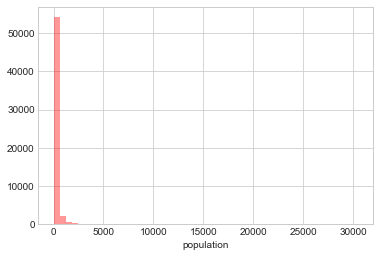

In [53]:
# Show graph of the population
sns.distplot(df['population'],bins=50,kde=False,color='red')

In [54]:
df.population.describe()

count    57588.000000
mean       185.570831
std        477.744239
min          0.000000
25%          0.000000
50%         35.000000
75%        230.000000
max      30500.000000
Name: population, dtype: float64

Since there is a huge outlier of 30500, the mean is probably heavily influenced by the outlier.
Therefore the median would be a good option for filling the zero values

In [55]:
# fill zero values of population with the median (35)
df.population = df.population.replace(0,df.population.median()) 

In [56]:
# check for remaining zero values
df.apply(lambda x: sum(x==0)/59400*100)

funder                    0.000000
gps_height                0.000000
installer                 0.000000
longitude                 0.000000
latitude                  0.000000
basin                     0.000000
region                    0.000000
population                0.000000
public_meeting            0.000000
permit                    0.000000
construction_year         0.000000
extraction_type_class     0.000000
management_group          0.000000
payment_type              0.000000
quality_group             0.000000
quantity_group            0.000000
source_type               0.000000
waterpoint_type           0.000000
status_group             37.488215
dtype: float64

## 3.4 Creating dummy variables for categorical features

In [57]:
# create an array of categorical features based on dtype
categorical_features = df.dtypes[df.dtypes == object].index.values

In [58]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, columns = categorical_features)

In [59]:
# transpose dataframe
df.head().T

,0,1,2,3,4
gps_height,1390.000000,1399.000000,686.000000,263.000000,1329.265008
longitude,34.938093,34.698766,37.460664,38.486161,31.130847
latitude,-9.856322,-2.147466,-3.821329,-11.155298,-1.825359
population,109.000000,280.000000,250.000000,58.000000,35.000000
status_group,2.000000,2.000000,2.000000,0.000000,2.000000
funder_Danida,0.000000,0.000000,0.000000,0.000000,0.000000
funder_District Council,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Government Of Tanzania,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Hesawa,0.000000,0.000000,0.000000,0.000000,0.000000
funder_Kkkt,0.000000,0.000000,0.000000,0.000000,0.000000


## 3.5 Normalize features: gps_height, longitude, latitude and population

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['gps_height','longitude','latitude','population']] = scaler.fit_transform(df[['gps_height','longitude','latitude','population']])

In [63]:
df.head()

,gps_height,longitude,latitude,population,status_group,funder_Danida,funder_District Council,funder_Government Of Tanzania,funder_Hesawa,funder_Kkkt,funder_Other,funder_Rwssp,funder_Tasaf,funder_Unicef,funder_World Bank,funder_World Vision,installer_CES,installer_Central government,installer_Commu,installer_DANIDA,installer_DWE,installer_Government,installer_Hesawa,installer_KKKT,installer_Other,installer_RWE,installer_TCRS,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,...,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_Unknown,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.527131,-0.081144,-1.413152,-0.186875,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0.543575,-0.172932,1.330357,0.174351,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,-0.759104,0.886320,0.734645,0.110978,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.531941,1.279621,-1.875446,-0.294609,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.416166,-1.541311,1.444992,-0.343195,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## 3.6 Export clean dataset to CSV

In [64]:
# export clean dataframe to CSV
df.to_csv('Clean_data_waterpump.csv',encoding='utf-8', index=False)

# 4. Data analysis & visualisation 

In [4]:
# read clean csv
df = pd.read_csv('Clean_data_waterpump.csv')

In [5]:
df.head()

,gps_height,longitude,latitude,population,status_group,funder_Danida,funder_District Council,funder_Government Of Tanzania,funder_Hesawa,funder_Kkkt,funder_Other,funder_Rwssp,funder_Tasaf,funder_Unicef,funder_World Bank,funder_World Vision,installer_CES,installer_Central government,installer_Commu,installer_DANIDA,installer_DWE,installer_Government,installer_Hesawa,installer_KKKT,installer_Other,installer_RWE,installer_TCRS,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,...,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_Unknown,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.527131,-0.081144,-1.413152,-0.186875,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0.543575,-0.172932,1.330357,0.174351,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,-0.759104,0.886320,0.734645,0.110978,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.531941,1.279621,-1.875446,-0.294609,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.416166,-1.541311,1.444992,-0.343195,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## 4.1 Target histogram

In [6]:
df.status_group.value_counts()

2    31389
0    22268
1     3931
Name: status_group, dtype: int64

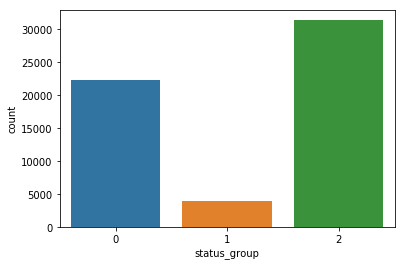

In [7]:
# labels: 2 = funtional, 1 = functional needs repair, 0 = non functional
sns.countplot(x='status_group',data=df)

## 4.2 Scatterplot of latitude, longitude, population and status

Text(0.5,1,'Status water pumps')

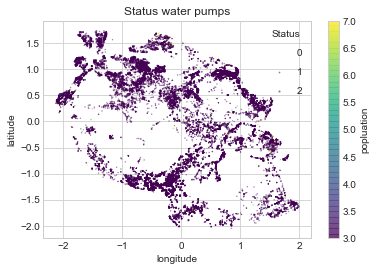

In [69]:
lat, lon = df['latitude'],df['longitude']
population, status = df['population'], df['status_group']

plt.scatter(lon, lat, label=None, c=population, cmap='viridis', s=status, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='popluation')
plt.clim(3,7)

#legend
for status in [0,1,2]:
     plt.scatter([],[],c='k', alpha=0.3, s=status, label=str(status))
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Status')
plt.title('Status water pumps')

In [ ]:
#pairplot with 'status_group' as hue
sns.pairplot(df,hue='status_group',palette='Dark2')

## 4.3 Jointplots

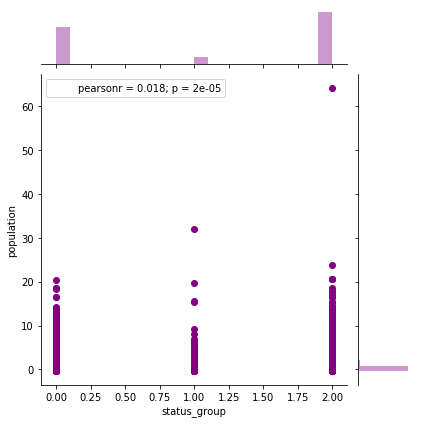

In [8]:
sns.jointplot(x='status_group',y='population',data=df,color='purple')

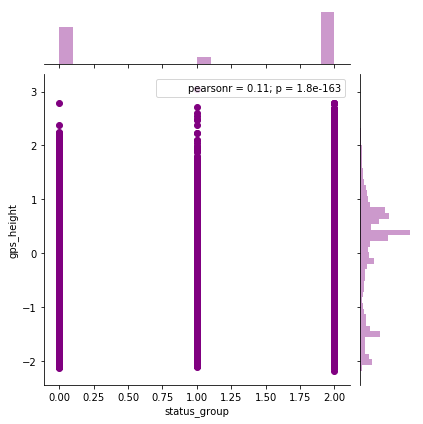

In [9]:
sns.jointplot(x='status_group',y='gps_height',data=df,color='purple')

# 5. Modelling and evaluation

Potential classifiers: logistic regression, decision tree, random forest, KNN

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X = df.drop('status_group', axis=1)
Y = df['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## 5.1 Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

### 5.1.1 Train logistic regression

In [23]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 5.1.2 Predictions and Evaluations

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
print(confusion_matrix(y_test,predictions))

[[4602    9 2708]
 [ 324   23  977]
 [1098    6 9258]]


In [26]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.63      0.69      7319
          1       0.61      0.02      0.03      1324
          2       0.72      0.89      0.79     10362

avg / total       0.73      0.73      0.70     19005



In [ ]:
# plot confusion matrix
class_names = df.status_group

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

    
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[6.29e-01 1.50e-03 3.69e-01]
 [2.43e-01 1.66e-02 7.40e-01]
 [1.06e-01 5.79e-04 8.94e-01]]


## 5.2 Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier

### 5.2.1 Train random forest

In [28]:
rfc = RandomForestClassifier(n_estimators=600)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 5.2.2 Predictions and Evaluations

In [30]:
predictions = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))

[[5745  129 1445]
 [ 241  427  656]
 [1049  294 9019]]


In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.78      0.80      7319
          1       0.50      0.32      0.39      1324
          2       0.81      0.87      0.84     10362

avg / total       0.79      0.80      0.79     19005



## 5.3 Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

### 5.3.1 Train random forest

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 5.3.2 Predictions and Evaluations

In [36]:
predictions = dtree.predict(X_test)

In [37]:
print(confusion_matrix(y_test,predictions))

[[5552  247 1520]
 [ 277  467  580]
 [1534  571 8257]]


In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.76      0.76      7319
          1       0.36      0.35      0.36      1324
          2       0.80      0.80      0.80     10362

avg / total       0.75      0.75      0.75     19005



## 5.4 KNN classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

### 5.4.1 Train KNN classifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 5.4.2 Predictions and Evaluations

In [42]:
pred = knn.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))

[[5552  247 1520]
 [ 277  467  580]
 [1534  571 8257]]


In [45]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.76      0.76      0.76      7319
          1       0.37      0.35      0.36      1324
          2       0.80      0.81      0.80     10362

avg / total       0.76      0.76      0.76     19005



In [46]:
# retrain with different K values from 1 to 40
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

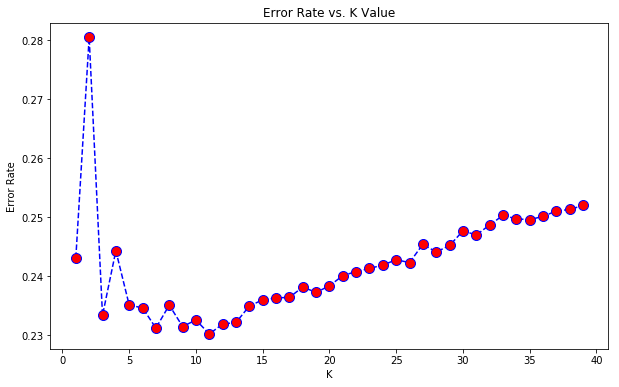

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### 5.4.3 Retrain with new K Value

In [48]:
# retrain with k = 11
knn = KNeighborsClassifier(n_neighbors=11)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [50]:
pred = knn.predict(X_test)

In [117]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.78      0.72      0.75      7319
          1       0.55      0.26      0.35      1324
          2       0.77      0.87      0.82     10362

avg / total       0.76      0.77      0.76     19005



# 6. Best model evaluation

The most critical water pumps are the ones with the status 'functional but needs repair'. If those water pumps are classified as false negatives, this can cost human lives. The worst case is when a water pump is functional but needs repair, but is classified as 'functional'. Hence, for this case, the false negative is most important. Therefore, the recall is the most important measure for model performance. 

Specifically, the recall of 'functional but needs repair' is important.
The 'functional but needs repair' that are classified as 'functional' need to be as low as possible. 

The best scoring model seems the Random Forest.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)

In [52]:
# create a dataframe of features importances
feature_importances = pd.DataFrame(rfc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [53]:
feature_importances

,importance
longitude,0.149666
latitude,0.147207
gps_height,0.078669
quantity_group_dry,0.072647
population,0.053593
waterpoint_type_other,0.029721
quantity_group_enough,0.029136
extraction_type_class_other,0.025044
payment_type_never pay,0.016382
quantity_group_insufficient,0.014174


From the feature importance dataframe can be seen that place, defined by longitude, latitude and height is most important. This is followed by the quantity group and population.

# 7. Tuning hyperparameters for optimisation

In [17]:
from sklearn.model_selection import GridSearchCV
from time import time

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rfc, param_grid=param_grid)
start = time()
grid_search.fit(X_train,y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)